### サンドボックス

In [3]:
# 配列の平均を取るコード
import statistics

list = [1, 2, 3, 4]
mean = statistics.mean(list)

print("平均値：{}".format(mean))

平均値：2.5


In [ ]:
# 試したいコードを書いてみよう（左の▷を押して実行）


### 作成したget_status関数を試してみよう

In [9]:
import datetime
from get_status import get_status

# 引数の定義（ここでは具体値を入れてみる．）
past_time = datetime.datetime(year=2023, month=4, day=30, hour=12, minute=15, second=15)
current_time = datetime.datetime(year=2023, month=4, day=30, hour=12, minute=15, second=25)
past_status = 3
sensor_values = [23, 24, 25, 26, 27, 28, 29, 30]

# 関数の呼び出し
current_status, state_changed_time = get_status(current_time, past_time, past_status, sensor_values)

# 結果の確認
print("過去の状態：{} --> 現在の状態：{}".format(past_status, current_status))
print("状態が変化した時間：{}".format(state_changed_time))

過去の状態：3 --> 現在の状態：1
状態が変化した時間：2023-04-30 12:15:25


### 機械学習モデルを試してみよう

In [10]:
import pickle
import pandas as pd
import numpy as np

# 訓練データの読み込み
X = pd.read_csv("../data/train_data.csv", header=None).values[:5]
# 正解ラベルの読み込み
y = np.ravel(pd.read_csv("../data/train_label.csv", header=None).values)[:5]
# 読み込んだデータの表示
for i in range(len(X)):
    print("センサの値：{}, 正解ラベル：{}".format(X[i], y[i]))

# 訓練したモデルの読み込み
model = pickle.load(open("../models/knn_model.pkl", "rb"))
# センサの値から状態を予測
current_status = model.predict(X)

print("予測結果：{}".format(current_status))

センサの値：[19 20 20 20 20 20 20 20], 正解ラベル：0
センサの値：[20 21 21 21 20 20 20 20], 正解ラベル：0
センサの値：[31 32 32 31 31 31 31 31], 正解ラベル：1
センサの値：[12 13 13 13 15 16 16 17], 正解ラベル：0
センサの値：[14 17 18 17 19 21 22 22], 正解ラベル：0
予測結果：[0 0 1 0 0]


### 決定木がどのように判断しているか見てみよう

[Text(0.6, 0.8333333333333334, 'x[1] <= 26.5\ngini = 0.5\nsamples = 90\nvalue = [46, 44]'),
 Text(0.4, 0.5, 'x[5] <= 26.5\ngini = 0.042\nsamples = 47\nvalue = [46, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]')]

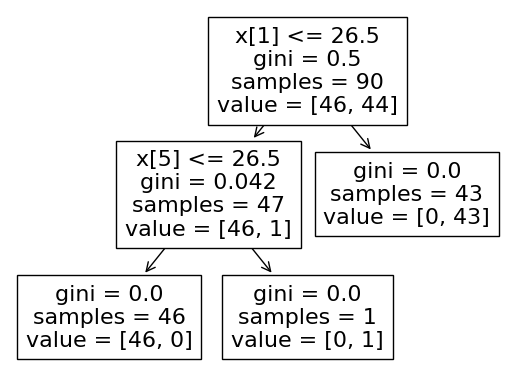

In [1]:
import pickle
from sklearn import tree
model = pickle.load(open("../models/tree_model.pkl", "rb"))
tree.plot_tree(model)